## Урок 2.1 Решающие деревья

## Энтропия E = - сумма(p * log 2 от p), где p - вероятность соответствующего события

Энтропия - мера неопределенности. Чем выше неопределенность, тем больше энтропия (максимальное значение = 1). На каждом шаге считая возможные варианты дерево считает энтропию и смотрит, где она уменьшается больше всего. 

**E(Y, Xi) = N1 / N * E1 + N2 / N * E2** , где N1 и N2 - количество результатов справа и слева

## Information Gate IG = E(Y) - E(Y, Xi) полная энтропия минус условная энтропия

Показывает, что произошло с неопределенностью, когда мы учли какой-то i-тый столбец

*Соответственно, если энтропию мы хотиv меньше, то IG больше*

In [1]:
from sklearn import tree

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Для визуализации дерева решений
from IPython.display import SVG, display, HTML
from graphviz import Source
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [5]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [6]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [7]:
# Посадить дерево
classifier = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
classifier

DecisionTreeClassifier(criterion='entropy')

In [9]:
# Сохраним все фичи в некоторую переменную 
X = data[['X_1', 'X_2']]
X

,X_1,X_2
0,1,0
1,1,0
2,1,0
3,0,1
4,0,0
5,0,0
6,0,0
7,1,1


In [10]:
# Сохраним целевую переменную
y = data['Y']

In [11]:
# Обучим наше дерево решений
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# graph = Source(tree.export_graphviz(classifier, 
#                                    out_file=None, 
#                                    feature_names=list(X), 
#                                    class_names=['Negative', 'Positive'], 
#                                    filled=True))
# display(SVG(graph.pipe(format='svg')))

[Text(167.4, 181.2, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(83.7, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(251.10000000000002, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

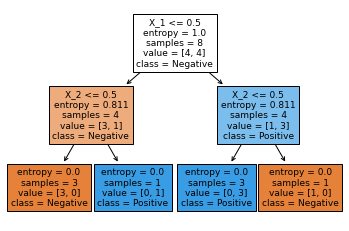

In [13]:
tree.plot_tree(classifier, feature_names=list(X), class_names=['Negative', 'Positive'], filled=True)
# True - левая ветвь, False  - правая

In [14]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


# Урок 2.3 Титаник

In [15]:
titanic_data = pd.read_csv('./titanic/train.csv')

In [16]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# Посмотрим сколько данных пропущено
titanic_data.isnull()                               # False - значение есть, True - значение NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Отберем самые очевидные переменные для обучения
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)

In [20]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [21]:
y = titanic_data['Survived']

In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
# Переделаем переменные sex и survived в числовые с помощью one-hot-encoding
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [24]:
# Уберем NaN, заполнив их медианным значением возраста
m = X['Age'].median()
X = X.fillna({'Age' : m})

In [25]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


### Привет переобучение!

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [27]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [28]:
#tree.plot_tree(clf)

In [29]:
#plt.figure(figsize=(100, 25))
#tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

### Исправляем наше переобучение

In [30]:
# Разделим данные на тест и трейн, чтобы можно было проверять полученные результаты
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Определим, что проблема действительно есть
clf.fit(X_train, y_train)
clf.score(X_train, y_train)                     # 97 % - точность, с которой мы предсказываем на трейне

0.9798657718120806

In [33]:
clf.score(X_test, y_test)                       # Оба на, проблема

0.7762711864406779

**Попытаемся решить проблему, ограничив глубину дерева**

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
clf.score(X_train, y_train)

0.8406040268456376

In [37]:
clf.score(X_test, y_test)

0.8067796610169492

**Попробуем подобрать параметр глубины дерева вручную**

In [38]:
max_depth_values = range(1, 100)

In [39]:
scores_data = pd.DataFrame()

In [40]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [41]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169
...,...,...,...
0,95,0.979866,0.783051
0,96,0.979866,0.769492
0,97,0.979866,0.779661
0,98,0.979866,0.766102


In [42]:
# Лирическое отступление, как представить данные в более удобном формате
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type', 
                           value_name='score')

In [43]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.783051
194,96,test_score,0.769492
195,97,test_score,0.779661
196,98,test_score,0.766102


<AxesSubplot:xlabel='max_depth', ylabel='score'>

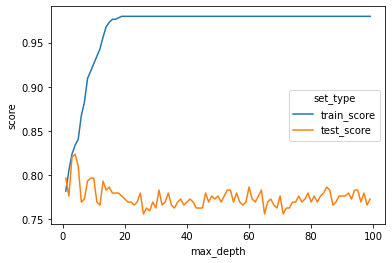

In [44]:
# Рисуем
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [47]:
cross_val_score(clf, X_train, y_train, cv=5)         # cv - на сколько частей мы хотим разбить наше множество
# Полученные результаты - это точность, которую, обучив модель, мы получим на каждом из фолдов

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [48]:
# Усредним полученные значения для итогового результата
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [49]:
scores_data = pd.DataFrame()

In [50]:
# Исправим наш подход
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth'       : [max_depth], 
                                    'train_score'     : [train_score], 
                                    'test_score'      : [test_score], 
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [51]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031
...,...,...,...,...
0,95,0.979866,0.772881,0.773557
0,96,0.979866,0.776271,0.771877
0,97,0.979866,0.772881,0.775224
0,98,0.979866,0.766102,0.778585


In [52]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', 
                           value_name='score')

In [53]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.773557
293,96,cross_val_score,0.771877
294,97,cross_val_score,0.775224
295,98,cross_val_score,0.778585


<AxesSubplot:xlabel='max_depth', ylabel='score'>

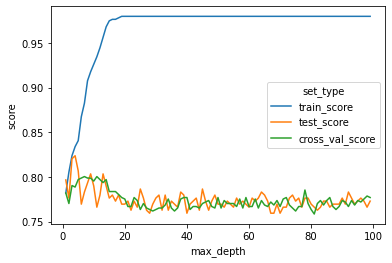

In [54]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [55]:
# Посмотрим на дерево решений
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.798711
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.798669
207,10,cross_val_score,0.795308


In [56]:
# Лучший результат у нас примерно на 10
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
cross_val_score(best_clf, X_test, y_test, cv=5).mean()                     # Заключительная точность

0.7830508474576271

# GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
clf = tree.DecisionTreeClassifier()

In [59]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 30)}

In [60]:
# estimator - модель 
grid_search_cv_clf = GridSearchCV(estimator=clf, param_grid=parametrs, cv=5)

In [61]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [62]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [63]:
best_clf = grid_search_cv_clf.best_estimator_

In [64]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [65]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [66]:
from sklearn.metrics import precision_score, recall_score

In [67]:
y_pred = best_clf.predict(X_test)

In [68]:
precision_score(y_test, y_pred)

0.8023255813953488

In [69]:
recall_score(y_test, y_pred)

0.575

**Важно, что на самом деле, в y_pred у нас хранятся вероятности отнесения к какому-то классу**

Скажем, мы можем поставить отсечку 51% для отнесения к классу 1, а можем 90% в зависимости от задачи.

In [70]:
y_predicted_proba = best_clf.predict_proba(X_test)      # Вытащили вероятность предсказаний

In [71]:
y_predicted_proba

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

<AxesSubplot:>

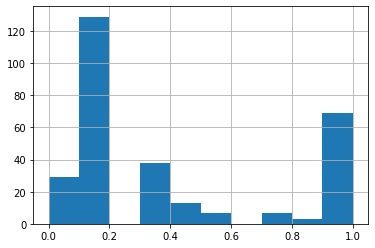

In [72]:
pd.Series(y_predicted_proba[:, 1]).hist()

In [73]:
# Переделаем отсечку с 0.5 до 0.8
y_pred = np.where(y_predicted_proba[:, 1] > 0.8, 1, 0)

In [74]:
precision_score(y_test, y_pred)         # Стал выше

0.8611111111111112

In [75]:
recall_score(y_test, y_pred)            # Стал ниже

0.5166666666666667

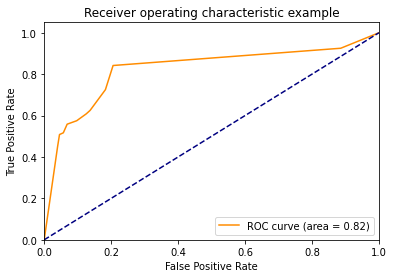

In [77]:
# Построим ro-кривую, чтобы понять, какую отсечку лучше выбрать
# True Positive Rate = Recall, False Positive Rate - для каких пассажиров с 0 мы сказали 1
# Рассматривать нужно сверху вниз
# Чем хуже классификатор, тем ближе кривая к диагонали

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Урок 3.1 Еще раз про переобучение и размер листа

In [78]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [79]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(2790.0, 2378.25, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(1395.0, 1698.75, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(697.5, 1019.25, 'SibSp <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(348.75, 339.75, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(1046.25, 339.75, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(2092.5, 1019.25, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(1743.75, 339.75, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(2441.25, 339.75, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(4185.0, 1698.75, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(3487.5, 1019.25, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(3138.75, 339.75, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(3836.25, 339.75, 'entropy = 0.187\nsamples = 105\nvalue = [3, 102]'),
 Text(4882.5, 101

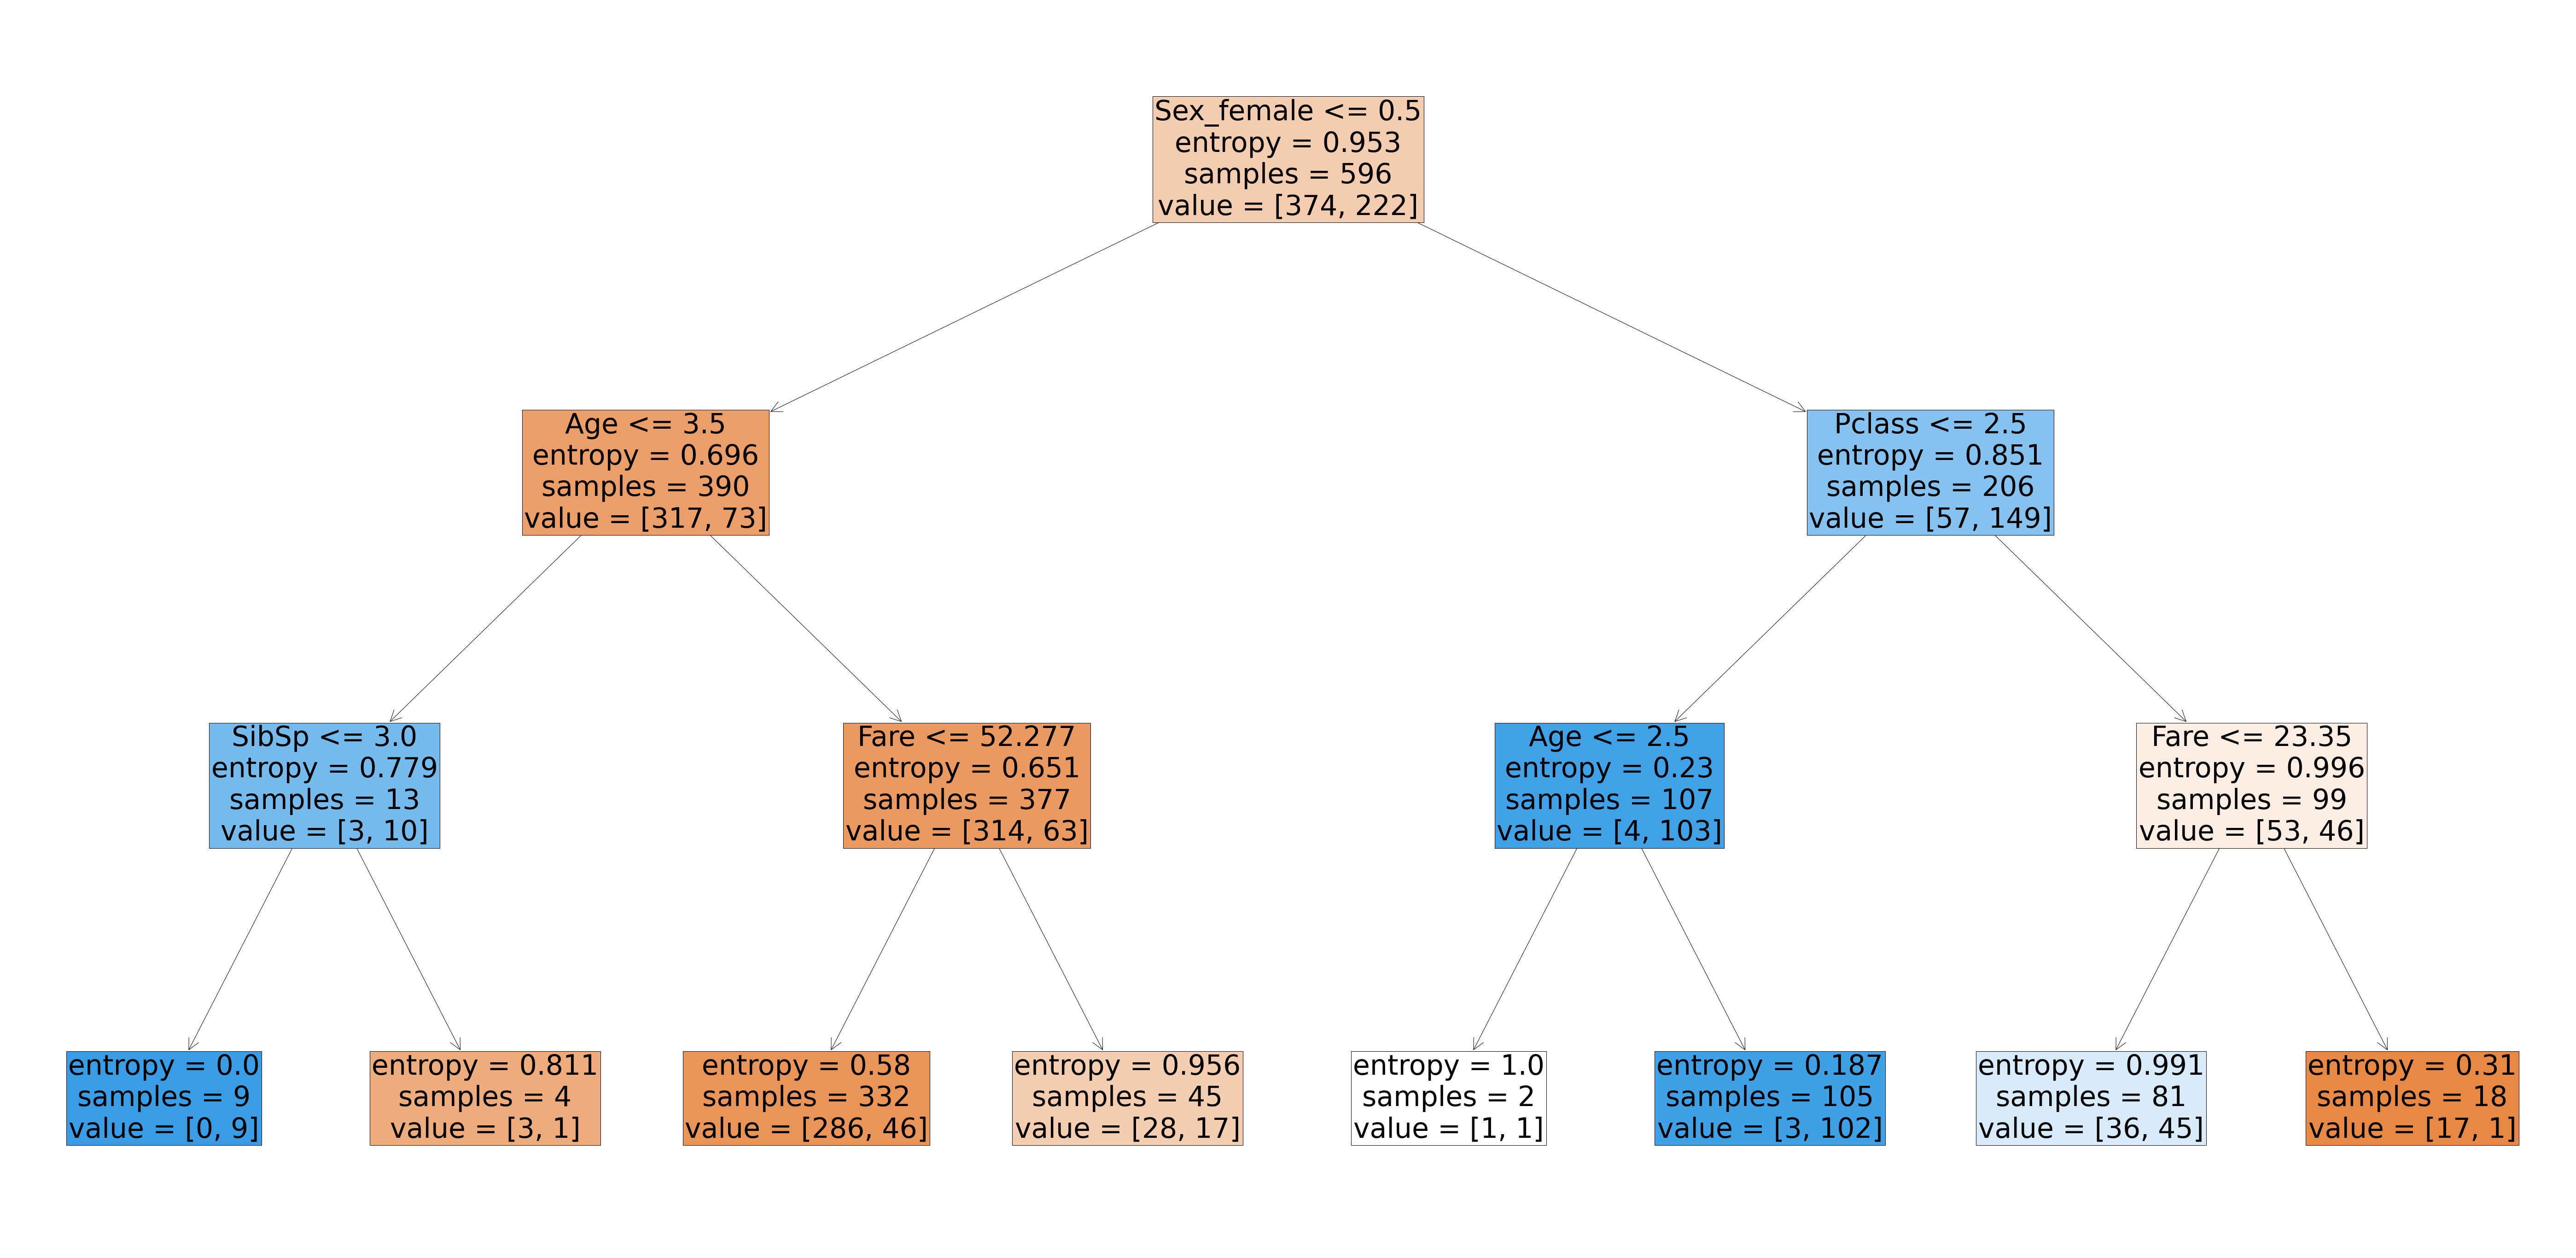

In [87]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, fontsize=60, feature_names=list(X), filled=True)

**Здесь нам не нравится лист с двумя примерами ибо их там слишком мало**

Ограничим минимальный размер листа, для которого мы делаем разбиение, с помощью параметра **min_samples_split**

In [89]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

In [92]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

[Text(2790.0, 2378.25, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(1116.0, 1698.75, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(558.0, 1019.25, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(1674.0, 1019.25, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(1116.0, 339.75, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(2232.0, 339.75, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(4464.0, 1698.75, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(3906.0, 1019.25, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(3348.0, 339.75, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(4464.0, 339.75, 'entropy = 0.187\nsamples = 105\nvalue = [3, 102]'),
 Text(5022.0, 1019.25, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]')]

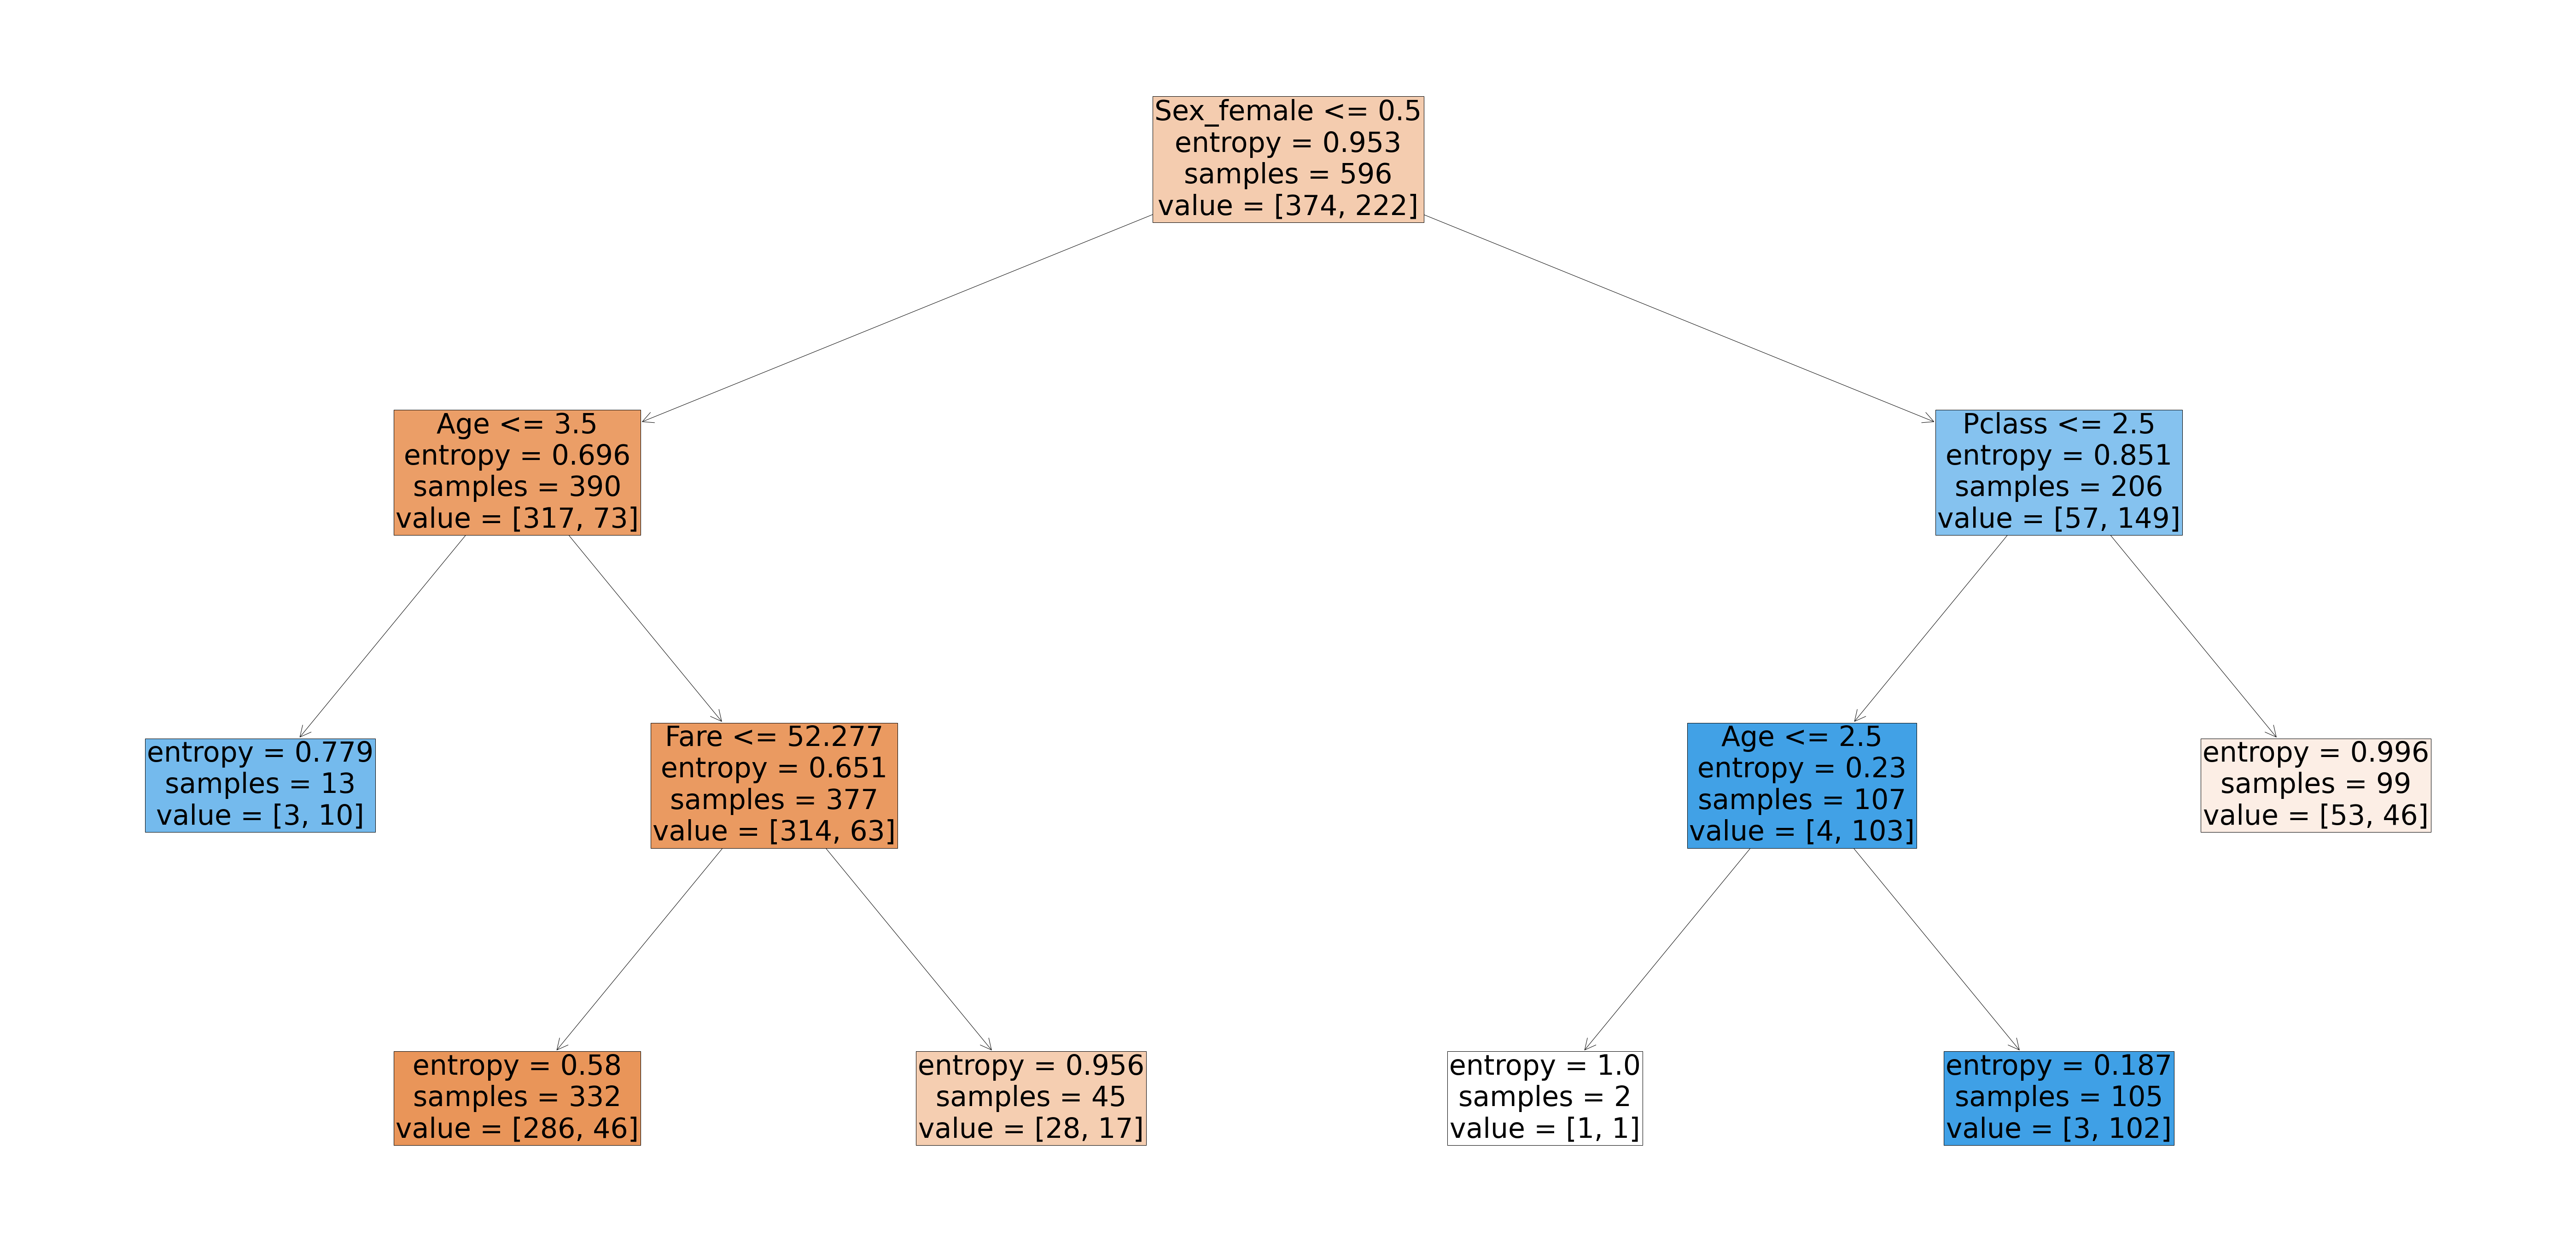

In [91]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, fontsize=60, feature_names=list(X), filled=True)

Теперь ни один лист, в котором меньше 100 примеров не будет разбит

Ограничим еще количество примеров в листе после разбиения с помощью параметра **min_samples_leaf**

In [94]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [95]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

[Text(2790.0, 2378.25, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(1116.0, 1698.75, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(558.0, 1019.25, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(1674.0, 1019.25, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(1116.0, 339.75, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(2232.0, 339.75, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(4464.0, 1698.75, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(3906.0, 1019.25, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(3348.0, 339.75, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(4464.0, 339.75, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(5022.0, 1019.25, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]')]

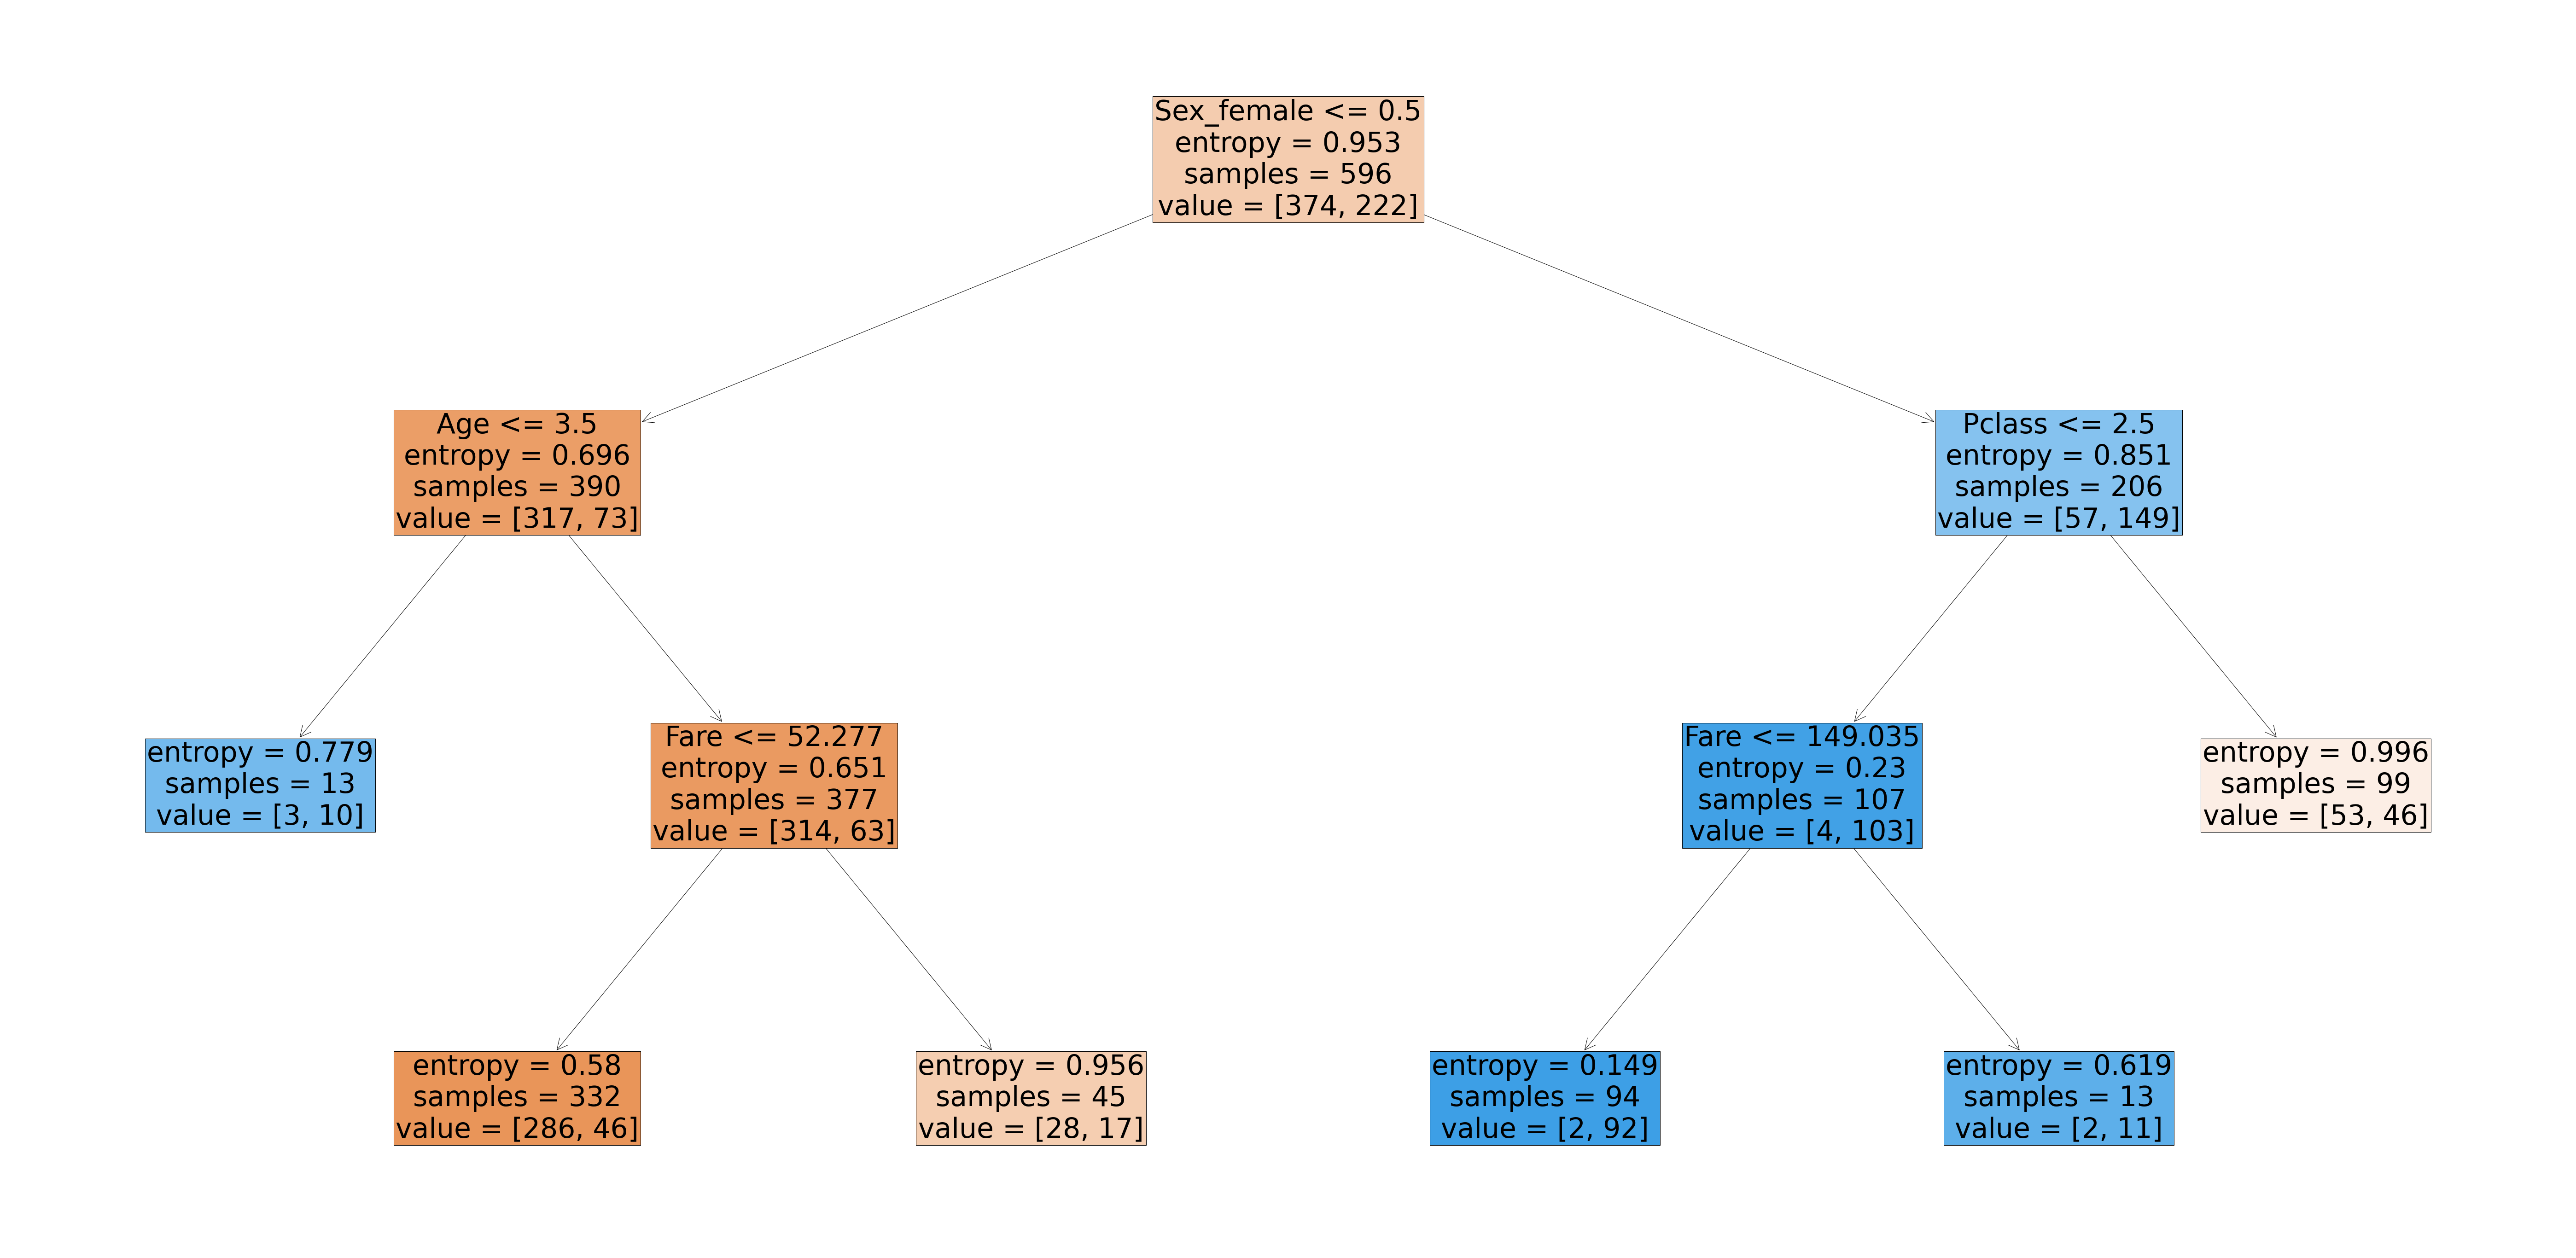

In [96]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, fontsize=60, feature_names=list(X), filled=True)

Теперь проблем с 2 не будет

# Модуль 3 RandomForest

Идея - создаем много деревьев, каждому даем свою уменьшенную подвыборку из основных данных. Обучаем и берем среднее.
Большинство параметров у всех деревьев (типа max_depth) будет одинаковым

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clf_rf = RandomForestClassifier()

In [102]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [103]:
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parametrs, cv=5)

In [104]:
grid_search_cv_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [105]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [106]:
best_clf_rf = grid_search_cv_clf_rf.best_estimator_

In [108]:
best_clf_rf.score(X_test, y_test)

0.8033898305084746

In [110]:
# Рассчитаем для каждой фичи взвешенную метрику того, насколько часто она использовалась 
feature_importances = best_clf_rf.feature_importances_
feature_importances

array([0.14401808, 0.15226003, 0.04501753, 0.03581978, 0.18035449,
       0.15738648, 0.22012014, 0.02795647, 0.00872697, 0.02834003])

In [111]:
feature_importances_dt = pd.DataFrame({'features' : list(X_train), 'feature_importances' : feature_importances})

In [115]:
# Расчтали, какие фичи к нас были наиболее важны
feature_importances_dt.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.220120
4,Fare,0.180354
5,Sex_female,0.157386
1,Age,0.152260
0,Pclass,0.144018
2,SibSp,0.045018
3,Parch,0.035820
9,Embarked_S,0.028340
7,Embarked_C,0.027956
8,Embarked_Q,0.008727


**-------------------------------------------------------------------------------------------------------------------------**
### Домашнее задание

In [116]:
dt = pd.read_csv('heart.csv')

In [117]:
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [118]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [119]:
X_train = dt.drop('target', axis=1)

In [122]:
y_train = dt['target']

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

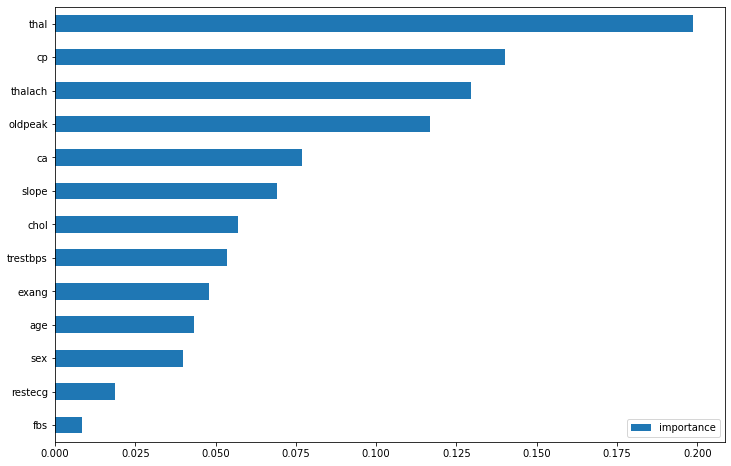

In [125]:
# Код для отрисовки важностей фичей
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### Домашнее задание

In [57]:
iris = pd.read_csv('train_iris.csv')
iris

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [58]:
X_train = iris.drop(['Unnamed: 0', 'species'], axis=1)
X_train

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5
...,...,...,...,...
95,6.5,3.0,5.2,2.0
96,6.7,3.3,5.7,2.1
97,6.3,2.7,4.9,1.8
98,6.3,2.5,5.0,1.9


In [59]:
y_train = iris['species']
y_train

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

In [60]:
iris_test = pd.read_csv('test_iris.csv')
iris_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [61]:
X_test = iris_test.drop(['Unnamed: 0', 'species'], axis=1)
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [62]:
y_test = iris_test['species']
y_test.head()

0    2
1    1
2    2
3    1
4    0
Name: species, dtype: int64

In [63]:
iris_scores_data = pd.DataFrame()

In [64]:
np.random.seed(0)
for max_depth in max_depth_values:
    iris_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    iris_clf.fit(X_train, y_train)
    
    train_score = iris_clf.score(X_train, y_train)
    test_score = iris_clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score]})
    iris_scores_data = iris_scores_data.append(temp_score_data)

In [65]:
iris_scores_data_long = pd.melt(iris_scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type', 
                           value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

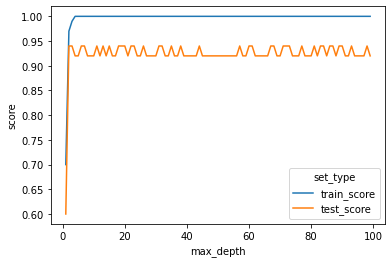

In [66]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=iris_scores_data_long)

In [67]:
animals_data = pd.read_csv('dogs_n_cats.csv')
animals_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [68]:
X_animal_train = animals_data.drop('Вид', axis=1)
X_animal_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [69]:
y_animal_train = animals_data['Вид']
y_animal_train

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [70]:
animals_scores_data = pd.DataFrame()

In [71]:
for max_depth in max_depth_values:
    animals_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    mean_cross_val_score = cross_val_score(animals_tree, X_animal_train, y_animal_train, cv=5).mean()
    
    temp_data = pd.DataFrame({'max_depth' : [max_depth], 'cross_score' : [mean_cross_val_score]})
    animals_scores_data = animals_scores_data.append(temp_data)

In [72]:
animals_scores_data

,max_depth,cross_score
0,1,1.0
0,2,1.0
0,3,1.0
0,4,1.0
0,5,1.0
...,...,...
0,95,1.0
0,96,1.0
0,97,1.0
0,98,1.0


In [73]:
best_animal_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
best_animal_clf.fit(X_animal_train, y_animal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(167.4, 163.07999999999998, 'Age <= 11.8\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]\nclass = Собачка'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]\nclass = Собачка'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]\nclass = Котик')]

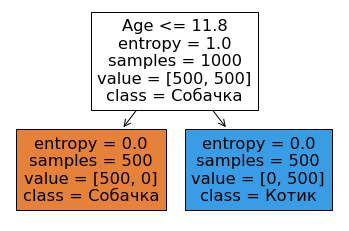

In [74]:
tree.plot_tree(best_animal_clf, feature_names=list(X), class_names=['Собачка', 'Котик'], filled=True)

In [75]:
df_ts = pd.read_json('dataset_209691_15.txt')
df_ts

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,23,27.6,1,1,0
1,27,32.4,1,1,0
2,28,33.6,1,1,0
3,32,38.4,1,1,0
4,23,27.6,1,1,0
...,...,...,...,...,...
95,14,5.6,1,0,1
96,10,4.0,1,0,1
97,8,3.2,1,0,1
98,9,3.6,1,0,1


In [76]:
result = best_animal_clf.predict(df_ts)

In [77]:
pd.Series(result)[result == 'собачка'].count()

41